# **PRCP-1027-Skin Disorder**

# problem Statement
 The goal is to predict the specific skin condition based on the combination of clinical and histopathological features. The classification of patients into one of these six classes is crucial for accurate diagnosis and treatment.

# Dataset Overview
This healthcare dataset consists of 34 columns, where 33 columns are treated as features and one column, labeled "class", serves as the target variable. The dataset is focused on diagnosing or analyzing a skin-related medical condition. The features are divided into two categories: 12 clinical features and 22 histopathological features. Each of these features is categorical, taking values in the range of 0, 1, 2, 3. A value of 0 represents the absence or minimal effect of the disease, while 1 and 2 represent mild effects, and 3 indicates a severe presence of the feature.

In addition to the categorical features, there is one continuous feature, Age, which is measured as a linear variable, representing the patient's age in years. This feature is distinct from the rest as it is continuous rather than categorical.
The target column, labeled "class" contains 6 unique values, each representing a distinct skin condition. This makes the dataset a multiclass classification problem.


# Task1

## 1. Importing important libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


import warnings
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv('/content/dataset_35_dermatology (1).csv')
df.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


# 2. Basic Check

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [77]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [78]:
df.shape

(366, 35)

In [79]:
df['class'].value_counts()

,count
class,
1,112
3,72
2,61
5,52
4,49
6,20


In [80]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [23]:
df.duplicated().sum()

0

In [91]:
df.isnull().sum()

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


changing age in to numeric as it was showing object vaues


In [92]:

print(df['Age'].dtype)

object


In [93]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [94]:
df['Age'].dtype

dtype('float64')

In [97]:
age_median = df['Age'].median()
age_median

35.0

In [98]:
#replace missing value by median
df['Age'].fillna(age_median, inplace=True)

<Axes: xlabel='class', ylabel='count'>

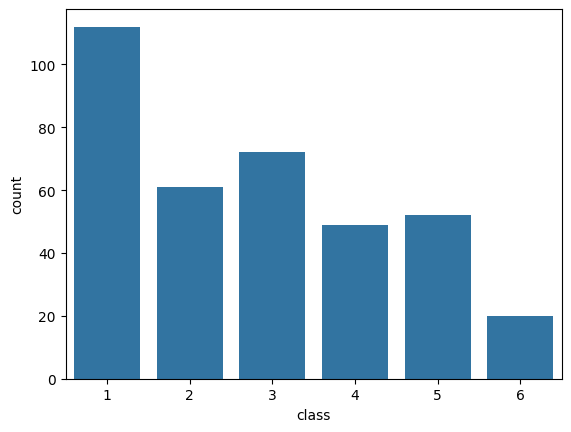

In [68]:
sns.countplot(data=df, x='class')

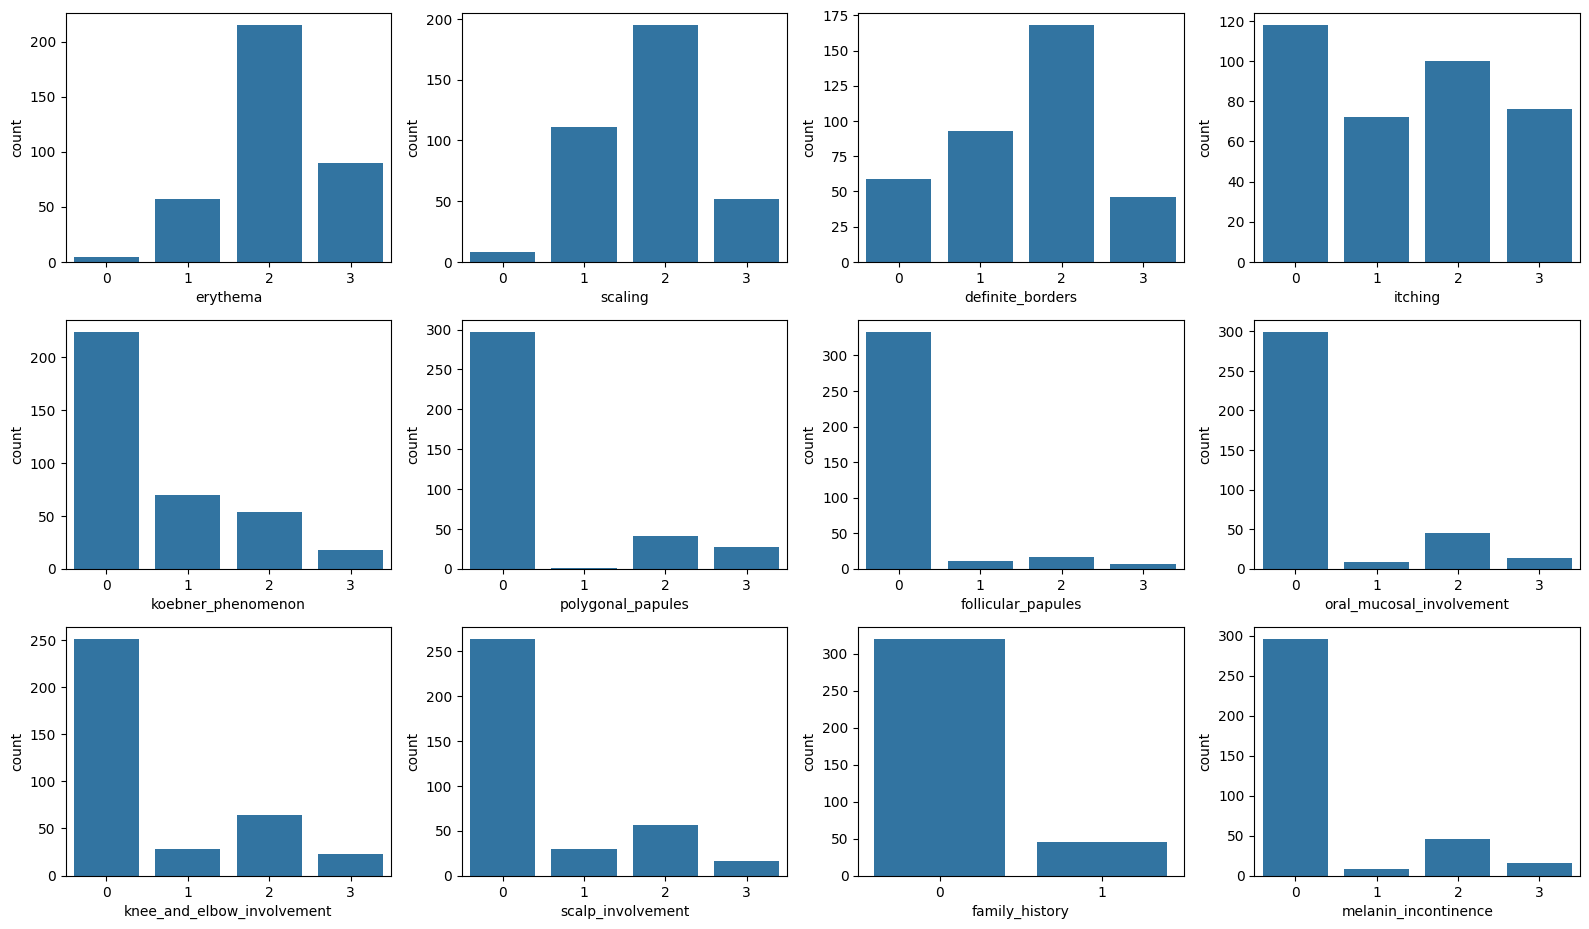

In [72]:
clinical_features=['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence']
plotnumb = 1
plt.figure(figsize=(16, 12))
for feature in clinical_features:
     sns.countplot(data=df, x=feature, ax=plt.subplot(4, 4, plotnumb))
     ax = plt.subplot(4, 4, plotnumb)
     plotnumb += 1
plt.tight_layout()
plt.show()

#3. scaling the age

In [130]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Age']=scaler.fit_transform(df[['Age']])
df.head(1)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0.733333,2


In [131]:
X=df.drop('class',axis=1)
y=df['class']

In [132]:
df['class'].value_counts()

,count
class,
1,112
3,72
2,61
5,52
4,49
6,20


In [133]:
#splitting the x and Y TRAIN
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [134]:
#balancing the target value
!pip install imblearn

## 4. Balancing the data

In [135]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = {1: 3.27, 2: 6.00, 3: 5.08, 4: 7.47, 5: 7.04, 6: 18.30}
sample_weights = compute_sample_weight('balanced',y_train)
sample_weights




array([1.15873016, 1.15873016, 0.93589744, 1.15873016, 1.15873016,
       0.93589744, 0.60082305, 1.18699187, 0.82485876, 0.82485876,
       0.93589744, 0.60082305, 1.18699187, 0.82485876, 0.82485876,
       0.60082305, 1.18699187, 2.8627451 , 0.82485876, 1.18699187,
       0.82485876, 1.15873016, 0.93589744, 0.60082305, 1.18699187,
       1.15873016, 0.93589744, 1.18699187, 0.60082305, 0.60082305,
       0.60082305, 0.93589744, 0.93589744, 1.18699187, 0.60082305,
       0.60082305, 2.8627451 , 0.93589744, 0.82485876, 1.15873016,
       1.15873016, 1.15873016, 0.93589744, 0.82485876, 1.18699187,
       0.93589744, 0.60082305, 1.18699187, 0.93589744, 0.82485876,
       0.93589744, 0.60082305, 0.60082305, 0.82485876, 0.60082305,
       0.60082305, 0.60082305, 0.93589744, 0.82485876, 0.82485876,
       1.15873016, 0.60082305, 0.82485876, 0.60082305, 1.18699187,
       0.93589744, 0.93589744, 0.60082305, 0.60082305, 0.60082305,
       1.15873016, 0.60082305, 0.82485876, 0.93589744, 1.15873

In [137]:
pd.Series(sample_weights).value_counts()

,count
0.600823,81
0.824859,59
0.935897,52
1.158730,42
1.186992,41
2.862745,17


# Task2

# 5. ML Algorithm

## 5.1 Logistic Regression

In [138]:
# logistic classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()
lr.fit(X_train,y_train, sample_weight=sample_weights)











LogisticRegression()

In [139]:
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [140]:
y_pred

array([1, 1, 4, 1, 3, 1, 2, 1, 1, 6, 3, 1, 1, 1, 2, 3, 2, 1, 1, 5, 4, 1,
       3, 3, 1, 2, 4, 1, 1, 4, 1, 3, 1, 5, 3, 3, 1, 5, 6, 4, 1, 2, 1, 5,
       1, 1, 2, 2, 2, 3, 1, 6, 1, 5, 1, 5, 1, 1, 2, 1, 1, 3, 3, 4, 5, 5,
       5, 1, 5, 2, 3, 3, 4, 1])

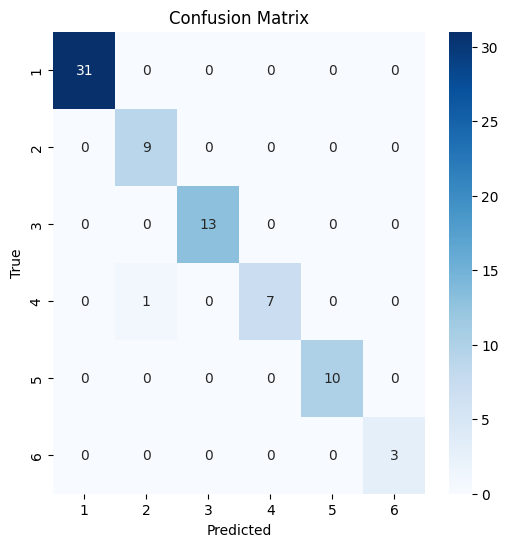

In [141]:


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 5.2 Decision Tree

In [142]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [143]:
y_pred=dt.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9594594594594594
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       0.90      1.00      0.95         9
           3       1.00      0.85      0.92        13
           4       0.89      1.00      0.94         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



## 5.3 Random Forest

In [144]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



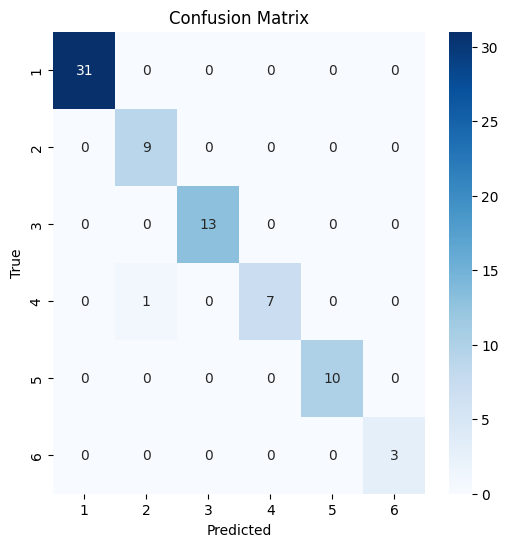

In [146]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Task3
 ## Conclusion


In this datset according to the description of data after preprocessing I applies three machine learning algorithm.


1.   Logistic Regression
2.   Decision Tree
3.   Random Forest

accuracy score remained very good on test data. Random forest give best result  in all these three, which I encounter 98 perent.
According to medel best accuracy score I would like to  give suggestion to the doctors that you can enhance their diagnostic efficiency by utilizing the predictive model to assess skin diseases quickly based on clinical and histopathological features. By inputting these features, physicians receive immediate insights into potential conditions, allowing them to categorize the disease severity using a grading system from 1 to 6. This streamlined approach facilitates rapid decision-making, especially for cases with overlapping symptoms. Integrating the model into electronic health record (EHR) systems can further enhance workflow, ensuring that healthcare providers have easy access to model predictions during patient evaluations.